In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# For visualization (optional)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [13]:
# Create synthetic data
np.random.seed(42)

# Class 0: Points around (0, 0, 0)
class_0 = np.random.randn(100, 3)

# Class 1: Points around (1, 1, 1)
class_1 = np.random.randn(100, 3) + 1

# Combine the data
X = np.vstack((class_0, class_1))
y = np.hstack((np.zeros(100), np.ones(100)))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [14]:
# Initialize the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)


In [15]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print classification report
print(classification_report(y_test, y_pred))


Accuracy: 81.67%
              precision    recall  f1-score   support

         0.0       0.88      0.74      0.81        31
         1.0       0.76      0.90      0.83        29

    accuracy                           0.82        60
   macro avg       0.82      0.82      0.82        60
weighted avg       0.83      0.82      0.82        60



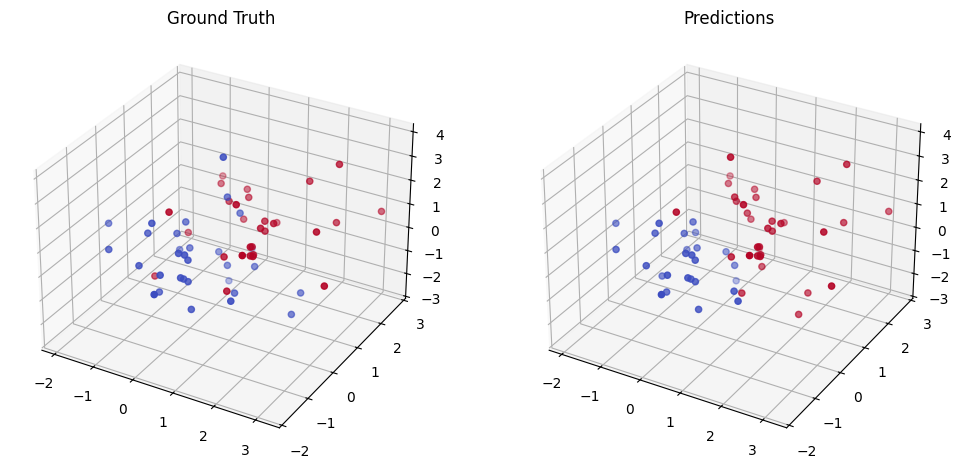

In [16]:
# Visualization of the original point cloud and the predictions
fig = plt.figure(figsize=(12, 6))

# Original point cloud
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=y_test, cmap='coolwarm', marker='o')
ax1.set_title('Ground Truth')

# Predicted point cloud
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=y_pred, cmap='coolwarm', marker='o')
ax2.set_title('Predictions')

plt.show()
